In [19]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq


/var/folders/g0/0ymp9yy178g159xmbf9r15k40000gn/T/ipykernel_17462/1822046285.py:5: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sweep_out_rate, sweep_out = wavfile.read(sweep_out_path)


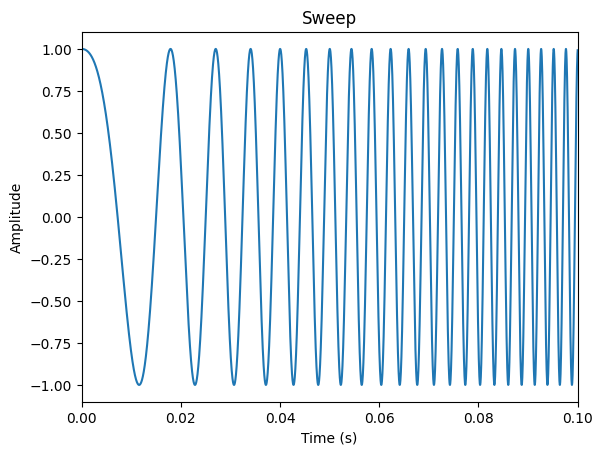

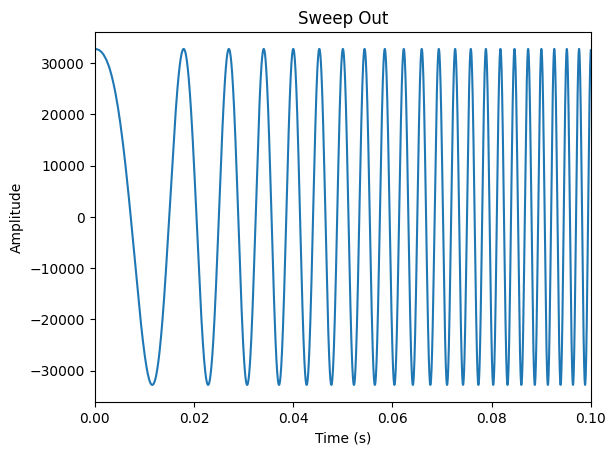

In [20]:
sweep_path = 'inputs/sweep.wav'
sweep_rate, sweep = wavfile.read(sweep_path)

sweep_out_path = 'sweep aup/sweep_out.wav'
sweep_out_rate, sweep_out = wavfile.read(sweep_out_path)
t = np.linspace(0, len(sweep)/sweep_rate, len(sweep))


#plot the sweep
plt.plot(t, sweep)
plt.title('Sweep')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.xlim(0, 0.1)

plt.show()

#plot the sweep_out
t = np.linspace(0, len(sweep_out)/sweep_out_rate, len(sweep_out))
plt.plot(t, sweep_out)
plt.title('Sweep Out')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.xlim(0, 0.1)
plt.show()



In [21]:
def apply_fft(data, sample_rate):
    # Perform FFT
    N = len(data)
    yf = fft(data)

    # obtener frecuencias
    xf = fftfreq(N, 1 / sample_rate)

    # Calcular magnitud y fase
    magnitude = np.abs(yf)
    phase = np.angle(yf)

    return xf[:N // 2], magnitude[:N // 2], phase[:N // 2] # devolver solo frecuencias positivas

# Dibuja el diagrama de Bode
def plot_bode(frequencies, magnitude, phase):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

    # dibujar magnitud
    ax1.plot(frequencies, 20 * np.log10(magnitude))
    ax1.set_title('Bode Diagram')
    ax1.set_ylabel('Magnitude (dB)')
    ax1.set_xscale('log')
    ax1.grid()

    # dibujar fase
    ax2.plot(frequencies, phase * 180 / np.pi)
    ax2.set_ylabel('Phase (degrees)')
    ax2.set_xlabel('Frequency (Hz)')
    ax2.set_xscale('log')
    ax2.grid()

    plt.tight_layout()
    plt.show()

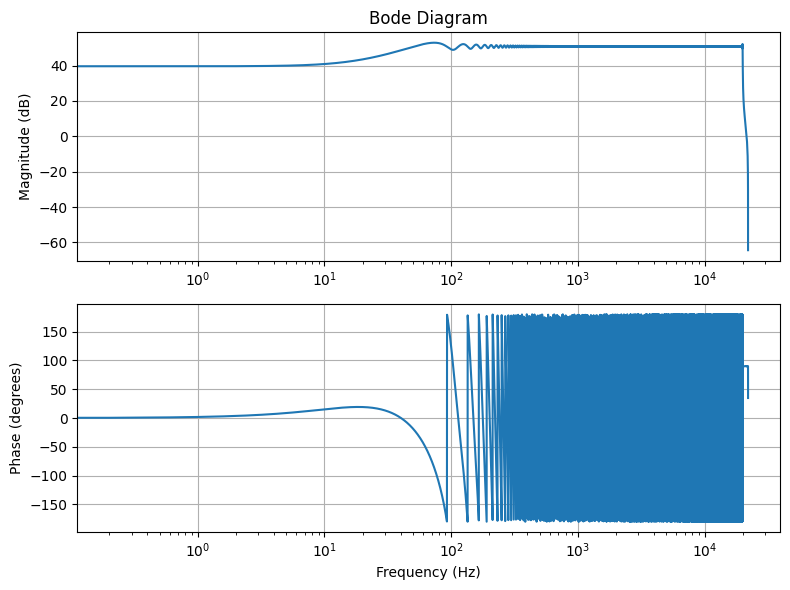

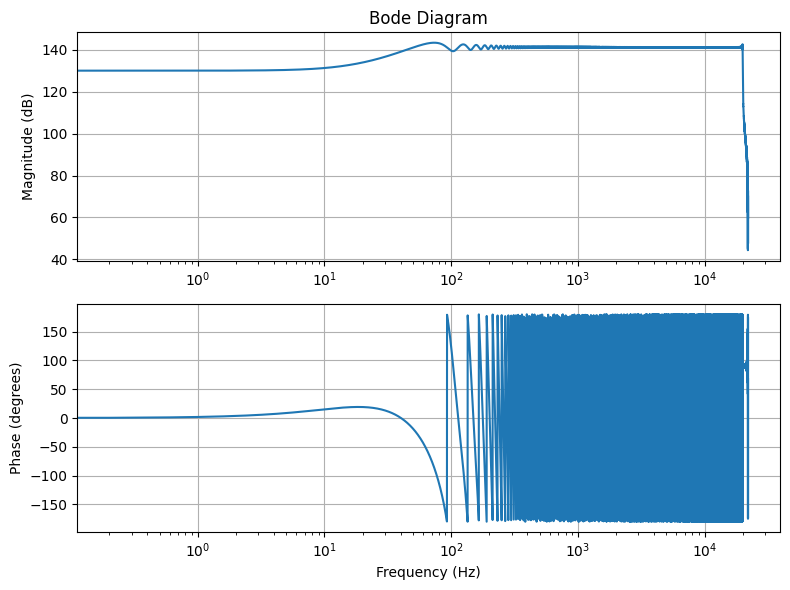

In [22]:
#plot the bode diagram
frequencies, magnitude, phase = apply_fft(sweep, sweep_rate)
plot_bode(frequencies, magnitude, phase)

frequencies, magnitude, phase = apply_fft(sweep_out, sweep_out_rate)
plot_bode(frequencies, magnitude, phase)
